# Pemanfaatan ST-DBSCAN Dalam Pencarian Lokasi Evakuasi

## Library yang digunakan

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

from mpl_toolkits import mplot3d

import math
from geopy.distance import great_circle

Matplotlib version:  3.1.1


## Import data yang digunakan

In [2]:
# df = pd.read_csv("natural_disaster_human_mobility.csv")
# Kode 01_Wipha, 02_Halong, 08_Rammasun_Manila
# data = df.loc[df['disaster.event'] == "02_Halong"]
data = pd.read_csv("example1.csv")
data.reset_index(drop=True, inplace=True)
data.head(5)

,maid,id_type,latitude,longitude,horizontal_accuracy,vertical_accuracy,altitude,ipv4,ipv6,user_agent,...,postcode,geohash,hex8,hex9,carrier,timestamp,heading,speed,wifi_ssid,wifi_bssid
0,44bdf0262eb66d7b8a42c0ac27b5c55a68fa7aa9,GAID,-3.063063,128.201175,12.0,NaN,NaN,180.253.184.151,NaN,NaN,...,97561.0,qz7nt63h,88956ac043fffff,89956ac0437ffff,PT Telkom Indonesia,1623575725,NaN,NaN,NaN,NaN
1,4d87da1031a3230af9cfbe123a394e3f917bf5f2,GAID,-3.628690,128.234010,18.0,NaN,NaN,182.1.211.48,NaN,NaN,...,NaN,qz75q53j,88956a4b0dfffff,89956a4b0d3ffff,Telkomsel,1623740052,NaN,NaN,NaN,NaN
2,2c0c888262df250825d41628c2b8b37acb1229c5,GAID,-3.279279,128.967932,9.0,NaN,NaN,36.68.200.119,NaN,NaN,...,NaN,qz7tqep8,88956a3883fffff,89956a3882bffff,PT Telkom Indonesia,1623571018,NaN,NaN,NaN,NaN
3,c5aa2ba689265346db1be797975893c751909e9b,GAID,-3.656360,128.223790,4.0,NaN,NaN,180.253.187.200,NaN,NaN,...,97212.0,qz75jy3s,88954194d3fffff,89954194d37ffff,PT Telkom Indonesia,1623579397,NaN,NaN,NaN,NaN
4,ee7d810856c73e6ed3c07841913cb0b1f34acfe2,GAID,-3.699291,128.104886,10.0,NaN,NaN,36.68.206.32,NaN,NaN,...,97226.0,qz74gne4,8895419555fffff,8995419555bffff,PT Telkom Indonesia,1623830618,NaN,NaN,NaN,NaN


## Deskripsi data awal

### Jumlah data

In [3]:
data.count()

maid                   4932
id_type                4932
latitude               4932
longitude              4932
horizontal_accuracy    4932
vertical_accuracy         0
altitude                  0
ipv4                   4918
ipv6                      0
user_agent                0
country                4932
state_hasc             4932
city_hasc              4674
postcode               4496
geohash                4932
hex8                   4932
hex9                   4932
carrier                4884
timestamp              4932
heading                   0
speed                     0
wifi_ssid                 0
wifi_bssid                0
dtype: int64

### Tipe data

In [4]:
data.dtypes

maid                    object
id_type                 object
latitude               float64
longitude              float64
horizontal_accuracy    float64
vertical_accuracy      float64
altitude               float64
ipv4                    object
ipv6                   float64
user_agent             float64
country                 object
state_hasc              object
city_hasc               object
postcode               float64
geohash                 object
hex8                    object
hex9                    object
carrier                 object
timestamp                int64
heading                float64
speed                  float64
wifi_ssid              float64
wifi_bssid             float64
dtype: object

### Deskripsi data bersifat numerik

In [5]:
data.describe()

,latitude,longitude,horizontal_accuracy,vertical_accuracy,altitude,ipv6,user_agent,postcode,timestamp,heading,speed,wifi_ssid,wifi_bssid
count,4932.000000,4932.000000,4932.000000,0.0,0.0,0.0,0.0,4496.000000,4.932000e+03,0.0,0.0,0.0,0.0
mean,-4.417483,129.238735,12.011137,NaN,NaN,NaN,NaN,97376.293594,1.623682e+09,NaN,NaN,NaN,NaN
std,1.528437,2.084428,12.354387,NaN,NaN,NaN,NaN,199.696632,8.387283e+04,NaN,NaN,NaN,NaN
min,-8.324840,125.856030,1.000000,NaN,NaN,NaN,NaN,97111.000000,1.623542e+09,NaN,NaN,NaN,NaN
25%,-5.633378,128.177595,7.000000,NaN,NaN,NaN,NaN,97129.000000,1.623613e+09,NaN,NaN,NaN,NaN
50%,-3.686605,128.220450,10.000000,NaN,NaN,NaN,NaN,97451.000000,1.623671e+09,NaN,NaN,NaN,NaN
75%,-3.610000,130.452598,13.000000,NaN,NaN,NaN,NaN,97544.000000,1.623748e+09,NaN,NaN,NaN,NaN
max,-2.787903,134.875314,142.500000,NaN,NaN,NaN,NaN,97693.000000,1.623840e+09,NaN,NaN,NaN,NaN


### Jumlah nilai unik untuk data deskriptif

In [6]:
for column in data.columns:
    if data[column].dtypes == "object":
        print("Column name: {}".format(column))
        print("Unique entry: {}".format(len(data[column].unique())))
        print()

Column name: maid
Unique entry: 3204

Column name: id_type
Unique entry: 2

Column name: ipv4
Unique entry: 3055

Column name: country
Unique entry: 1

Column name: state_hasc
Unique entry: 1

Column name: city_hasc
Unique entry: 12

Column name: geohash
Unique entry: 2923

Column name: hex8
Unique entry: 1134

Column name: hex9
Unique entry: 1794

Column name: carrier
Unique entry: 26



### Fungsi penggambaran persebaran nilai latitude dan longitude

In [27]:
# Fungsi visualisasi data awal
def visualize_data(data) :
    # Menghasilkan scatter plot untuk latitude dan longitude
    data.plot(kind='scatter', x='latitude', y='longitude', figsize=(10, 6), color='darkblue')
    plt.title('Latitude vs Longitude in scatter')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.show()
    
    # Menghasilkan scatter plot untuk timestamp dan longitude
    data.plot(kind='scatter', x='timestamp', y='longitude', figsize=(10, 6), color='darkblue')
    plt.title('Timestamp vs Longitude in scatter')
    plt.xlabel('Timestamp')
    plt.ylabel('Longitude')
    plt.show()
    
    # Menghasilkan scatter plot untuk timestamp dan latitude
    data.plot(kind='scatter', x='timestamp', y='latitude', figsize=(10, 6), color='darkblue')
    plt.title('Timestamp vs Latitude in scatter')
    plt.xlabel('Timestamp')
    plt.ylabel('Latitude')
    plt.show()
    
    # Menghasilkan scatter plot untuk timestamp, latitude, dan longitude
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    ax.scatter3D(data['timestamp'], data['latitude'], data['longitude'], color = "green")
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Longitude')
    plt.title("Scatter Plot Latitude, Longitude, dan Timestamp")
    plt.show()

# Fungsi visualisasi hasil
def visualize_result(data) :
    # Menghasilkan scatter plot untuk latitude dan longitude
    plt.scatter(data.latitude, data.longitude, c=data.cluster, alpha = 0.6)
    plt.title('Latitude vs Longitude in scatter')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.show()
    
    # Menghasilkan scatter plot untuk timestamp dan longitude
    plt.scatter(data.date_time, data.longitude, c=data.cluster, alpha = 0.6)
    plt.title('Timestamp vs Longitude in scatter')
    plt.xlabel('Timestamp')
    plt.ylabel('Longitude')
    plt.show()
    
    # Menghasilkan scatter plot untuk timestamp dan latitude
    plt.scatter(data.date_time, data.latitude, c=data.cluster, alpha = 0.6)
    plt.title('Timestamp vs Latitude in scatter')
    plt.xlabel('Timestamp')
    plt.ylabel('Latitude')
    plt.show()
    
    # Menghasilkan scatter plot untuk timestamp, latitude, dan longitude
    fig = plt.figure(figsize=(26,6))
    ax = fig.add_subplot(131, projection='3d')
    ax.scatter(data.date_time, data.latitude, data.longitude, c=data.cluster, s=15)
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Longitude')
    plt.title("Scatter Plot Latitude, Longitude, dan Timestamp")
    plt.show()

## Mencari missing data pada tabel

In [8]:
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
  print(column)
  print("missing data : ",len(data) - missing_data[column].value_counts())
  print("")

maid
missing data :  False    0
Name: maid, dtype: int64

id_type
missing data :  False    0
Name: id_type, dtype: int64

latitude
missing data :  False    0
Name: latitude, dtype: int64

longitude
missing data :  False    0
Name: longitude, dtype: int64

horizontal_accuracy
missing data :  False    0
Name: horizontal_accuracy, dtype: int64

vertical_accuracy
missing data :  True    0
Name: vertical_accuracy, dtype: int64

altitude
missing data :  True    0
Name: altitude, dtype: int64

ipv4
missing data :  False      14
True     4918
Name: ipv4, dtype: int64

ipv6
missing data :  True    0
Name: ipv6, dtype: int64

user_agent
missing data :  True    0
Name: user_agent, dtype: int64

country
missing data :  False    0
Name: country, dtype: int64

state_hasc
missing data :  False    0
Name: state_hasc, dtype: int64

city_hasc
missing data :  False     258
True     4674
Name: city_hasc, dtype: int64

postcode
missing data :  False     436
True     4496
Name: postcode, dtype: int64

geoha

## Pembuatan nilai timestamp dari time

In [10]:
ts = [0 for i in range (len(data))]
for i in range (0, len(data)) :
    ts[i] = str(data['time'][i])
for i in range (0,len(ts)) :
    ts[i] = datetime(int(ts[i][:4]),int(ts[i][5:7]),int(ts[i][8:10]),int(ts[i][11:13]),int(ts[i][14:16])).timestamp()
#     print(i)
base_value = min(ts)
for i in range (0,len(ts)) :
    ts[i] = ts[i] - base_value
data.insert(5,"timestamp",ts,True)
data.head(15)

,disaster.event,user.anon,latitude,longitude.anon,time,timestamp
0,02_Halong,1,127.947271,43.314902,2014-08-13 15:51:40,1947060.0
1,02_Halong,2,127.823767,43.178472,2014-08-05 22:27:00,1279620.0
2,02_Halong,2,127.823767,43.178472,2014-08-05 23:56:06,1284960.0
3,02_Halong,2,127.823767,43.178472,2014-08-05 23:56:37,1284960.0
4,02_Halong,2,127.823767,43.178472,2014-08-05 23:57:26,1285020.0
5,02_Halong,2,127.823767,43.178472,2014-08-05 23:58:07,1285080.0
6,02_Halong,2,127.823767,43.178472,2014-08-05 23:59:00,1285140.0
7,02_Halong,2,127.823767,43.178472,2014-08-06 00:00:29,1285200.0
8,02_Halong,2,127.823767,43.178472,2014-08-06 00:01:22,1285260.0
9,02_Halong,2,127.823767,43.178472,2014-08-06 00:02:27,1285320.0


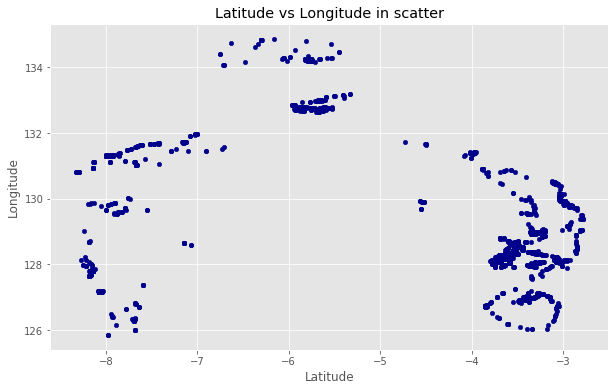

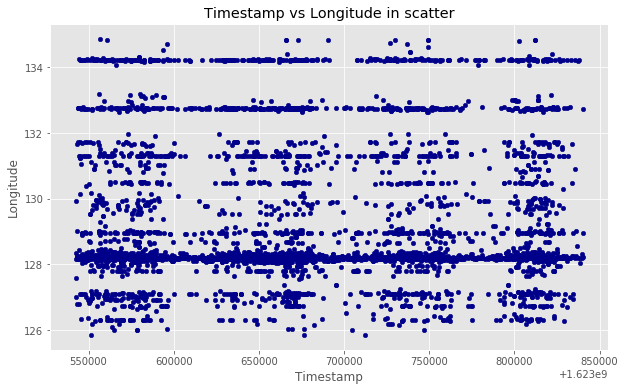

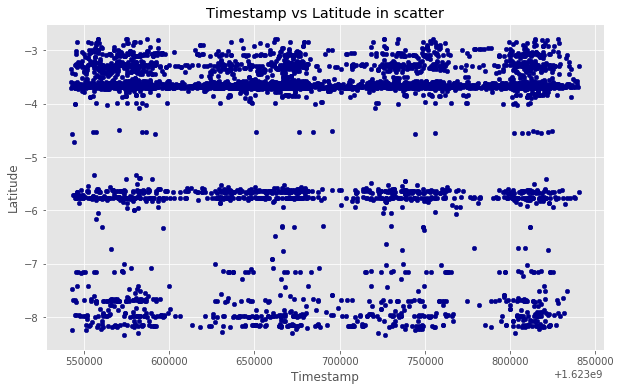

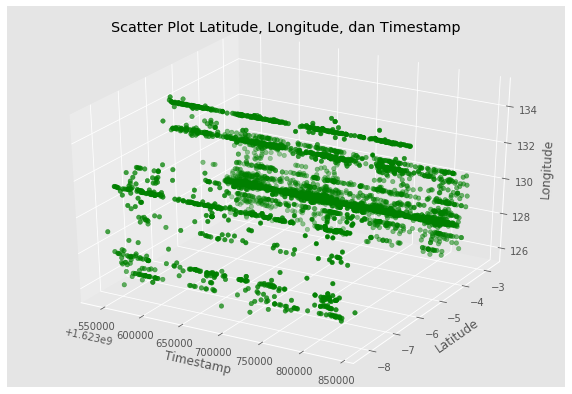

In [9]:
visualize_data(data)

In [12]:
# Nilai min_timestamp dan max_timestamp didapat dari http://agora.ex.nii.ac.jp/digital-typhoon/summary/wnp/s/201409.html.en
min_timestamp = datetime(2014,7,29,0,0).timestamp() - base_value
max_timestamp = datetime(2014,8,11,0,0).timestamp() - base_value
print("timestamp data range is (", min_timestamp, ",", max_timestamp, ")")

timestamp data range is ( 594000.0 , 1717200.0 )


## Pengurangan data yang tidak sesuai range timestamp

In [13]:
data.sort_values(by=['timestamp'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.head(15)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,disaster.event,user.anon,latitude,longitude.anon,time,timestamp
0,02_Halong,1975,127.678241,42.906424,2014-07-22 03:00:21,0.0
1,02_Halong,2107,127.817948,43.073515,2014-07-22 03:00:43,0.0
2,02_Halong,1295,127.749468,43.042948,2014-07-22 03:01:21,60.0
3,02_Halong,3199,127.660447,42.909017,2014-07-22 03:01:27,60.0
4,02_Halong,1991,127.731301,42.984906,2014-07-22 03:01:38,60.0
5,02_Halong,3100,127.704016,42.909514,2014-07-22 03:02:08,120.0
6,02_Halong,4869,127.821234,43.046919,2014-07-22 03:02:31,120.0
7,02_Halong,3329,127.736602,42.964810,2014-07-22 03:03:53,180.0
8,02_Halong,4869,127.821227,43.046916,2014-07-22 03:03:18,180.0
9,02_Halong,4368,127.784795,43.055323,2014-07-22 03:05:53,300.0


### Menghapus data yang lebih kecil dari nilai timestamp minimum

In [14]:
for i in range (len(data)) :
    if(data['timestamp'][i] > min_timestamp) :
        break

if(i>0) :
    del_index = [0 for j in range(i)]
    for j in range(i) :
        del_index[j] = j

data = data.drop(del_index)
data.head(15)

,disaster.event,user.anon,latitude,longitude.anon,time,timestamp
33044,02_Halong,4418,128.040227,43.237799,2014-07-29 00:01:47,594060.0
33045,02_Halong,2432,127.745401,42.947641,2014-07-29 00:01:40,594060.0
33046,02_Halong,1832,127.839295,43.031983,2014-07-29 00:01:56,594060.0
33047,02_Halong,2129,127.667764,42.902488,2014-07-29 00:01:27,594060.0
33048,02_Halong,522,127.722684,43.125843,2014-07-29 00:01:26,594060.0
33049,02_Halong,625,127.700657,42.927705,2014-07-29 00:01:58,594060.0
33050,02_Halong,1510,127.754711,42.999827,2014-07-29 00:01:48,594060.0
33051,02_Halong,474,127.766289,42.972563,2014-07-29 00:01:07,594060.0
33052,02_Halong,1569,127.813038,43.049222,2014-07-29 00:01:47,594060.0
33053,02_Halong,3424,127.730608,42.973740,2014-07-29 00:01:13,594060.0


In [15]:
data.sort_values(by=['timestamp'], ascending=False, inplace=True)
data.reset_index(drop=True, inplace=True)
data.head(15)

,disaster.event,user.anon,latitude,longitude.anon,time,timestamp
0,02_Halong,3783,127.677605,42.927462,2014-08-25 02:59:39,2937540.0
1,02_Halong,2194,127.714647,43.131481,2014-08-25 02:58:11,2937480.0
2,02_Halong,3771,127.719673,42.946389,2014-08-25 02:58:39,2937480.0
3,02_Halong,4381,127.709034,42.970650,2014-08-25 02:58:40,2937480.0
4,02_Halong,3783,127.677606,42.927452,2014-08-25 02:58:58,2937480.0
5,02_Halong,4967,127.703396,42.908458,2014-08-25 02:57:00,2937420.0
6,02_Halong,2096,127.734274,42.961726,2014-08-25 02:57:53,2937420.0
7,02_Halong,4381,127.709232,42.971177,2014-08-25 02:57:06,2937420.0
8,02_Halong,5116,127.725036,42.978274,2014-08-25 02:56:06,2937360.0
9,02_Halong,4381,127.708090,42.972561,2014-08-25 02:54:23,2937240.0


### Menghapus nilai yang lebih besar dari timestamp maximum

In [16]:
for i in range (len(data)) :
    if(data['timestamp'][i] < max_timestamp) :
        break

if(i>0) :
    del_index = [0 for j in range(i)]
    for j in range(i) :
        del_index[j] = j

data = data.drop(del_index)
data.reset_index(drop=True, inplace=True)
data.head(15)

,disaster.event,user.anon,latitude,longitude.anon,time,timestamp
0,02_Halong,349,127.722520,43.139263,2014-08-10 23:59:38,1717140.0
1,02_Halong,1329,127.832195,43.052753,2014-08-10 23:59:08,1717140.0
2,02_Halong,2267,127.760848,42.968269,2014-08-10 23:59:26,1717140.0
3,02_Halong,349,127.722520,43.139263,2014-08-10 23:59:15,1717140.0
4,02_Halong,2790,127.866863,43.080907,2014-08-10 23:59:54,1717140.0
5,02_Halong,488,127.720865,42.887191,2014-08-10 23:59:13,1717140.0
6,02_Halong,875,127.701932,42.962914,2014-08-10 23:59:28,1717140.0
7,02_Halong,58,127.859279,43.101593,2014-08-10 23:59:12,1717140.0
8,02_Halong,3062,127.683375,42.931733,2014-08-10 23:59:50,1717140.0
9,02_Halong,58,127.859281,43.101599,2014-08-10 23:59:52,1717140.0


In [17]:
data.sort_values(by=['user.anon'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.head(15)

,disaster.event,user.anon,latitude,longitude.anon,time,timestamp
0,02_Halong,2,127.823767,43.178472,2014-08-06 06:49:22,1309740.0
1,02_Halong,2,127.823767,43.178472,2014-08-06 00:02:27,1285320.0
2,02_Halong,2,127.823767,43.178472,2014-08-06 00:03:58,1285380.0
3,02_Halong,2,127.823767,43.178472,2014-08-06 09:36:36,1319760.0
4,02_Halong,2,127.823767,43.178472,2014-08-06 00:03:22,1285380.0
5,02_Halong,2,127.823767,43.178472,2014-08-06 00:05:04,1285500.0
6,02_Halong,2,127.823767,43.178472,2014-08-06 00:06:23,1285560.0
7,02_Halong,2,127.823767,43.178472,2014-08-06 00:07:57,1285620.0
8,02_Halong,2,127.823767,43.178472,2014-08-06 09:37:31,1319820.0
9,02_Halong,2,127.823767,43.178472,2014-08-06 06:44:41,1309440.0


In [18]:
data.describe()

,user.anon,latitude,longitude.anon,timestamp
count,66108.000000,66108.000000,66108.000000,6.610800e+04
mean,2458.759242,127.762976,43.007312,1.175481e+06
std,1461.834549,0.085962,0.112299,3.283185e+05
min,2.000000,127.640131,42.790564,5.940600e+05
25%,1255.000000,127.699741,42.929510,8.927850e+05
50%,2293.000000,127.745060,42.970935,1.179600e+06
75%,3646.500000,127.799291,43.052047,1.460880e+06
max,5243.000000,128.318100,43.584915,1.717140e+06


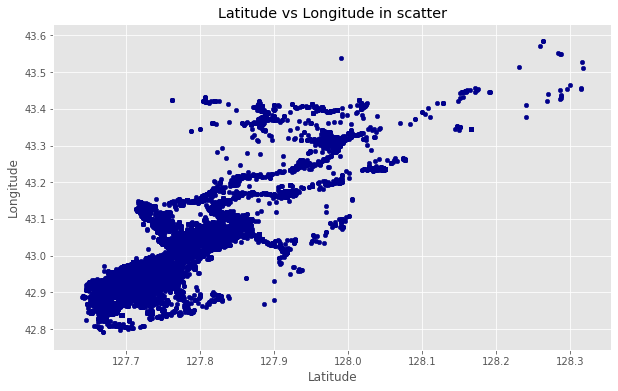

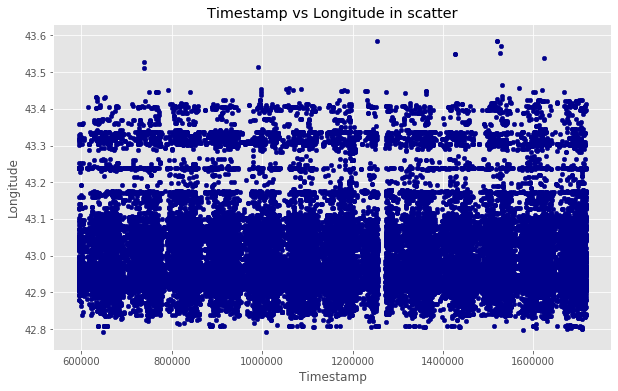

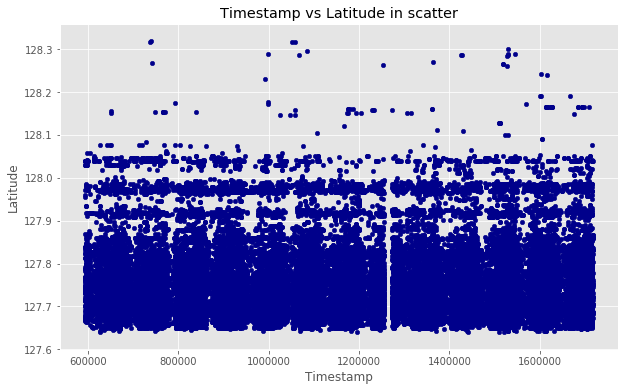

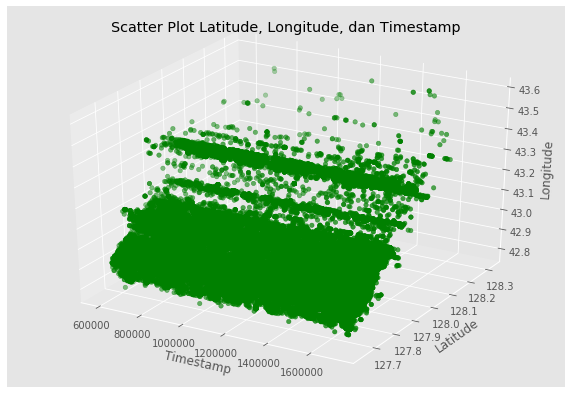

In [19]:
visualize_data(data)

## Pencarian nilai variabel awal

Cara heuristik yang akan digunakan untuk menentukan nilai k/ MinPts adalah dengan cara k = 2 X dimensi data - 1(Sander, Ester et al., 1998) dan ln(n) dimana n = jumlah data(Birant, 2006).

Langkah selanjutnya yang akan dilakukan adalah mencari nilai epsilon untuk tipe data spatial dan temporal. Metode yang akan dipakai adalah k-dist graph, dimana nilai jarak terdekat dari setiap objek dengan k tetangganya diurutkan, kemudian dicari nilai *elbow* pertama. Nilai tersebut akan digunakan sebagai nilai epsilon.(Sander, Ester et al., 1998)

In [10]:
k1 = 5
k2 = int(np.log(len(data)))
print("k1 dan k2 = ", k1, " dan ", k2)

k1 dan k2 =  5  dan  8


In [11]:
def search_eps(dataset, k, dataset_type) :
    # Mencari objek tetangga terdekat dengan algoritma KNN
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(dataset)
    distances, indices = neighbors_fit.kneighbors(dataset)
    # Mengurutkan jarak tetangga terdekat setiap objek dari yang terkecil
    distances = np.sort(distances, axis=0)
    # Plot jarak
    distances = distances[:,1]
    title = dataset_type + ' vs n'
    plt.title(title)
    plt.xlabel('n')
    plt.ylabel(dataset_type)
    plt.plot(distances)
    plt.show()
    return(distances)

# Zoom/ memfokuskan daerah plot berdasarkan input batasan
def zoom_eps(distances, x_min, x_max, y_min, y_max, dataset_type) :
    plt.axis([x_min, x_max, y_min, y_max])
    title = dataset_type + ' vs n'
    plt.title(title)
    plt.xlabel('n')
    plt.ylabel(dataset_type)
    plt.plot(distances)
    plt.show()

In [12]:
dataset_spatial = data[['latitude','longitude']]
dataset_spatial.head(10)

,latitude,longitude
0,-3.063063,128.201175
1,-3.628690,128.234010
2,-3.279279,128.967932
3,-3.656360,128.223790
4,-3.699291,128.104886
5,-3.675680,128.227730
6,-3.689726,128.182880
7,-3.627900,128.233070
8,-3.697755,128.179263
9,-3.097430,126.313573


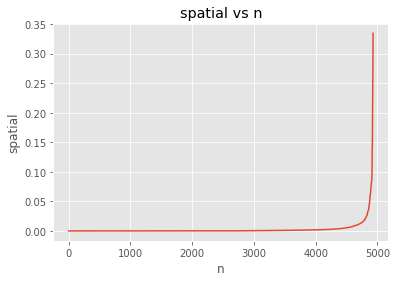

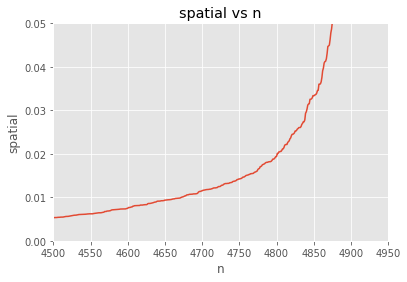

In [14]:
dist_spatial = search_eps(dataset_spatial,k2,'spatial')
zoom_eps(dist_spatial, 4500, 4950, 0, 0.05, 'spatial')

In [15]:
dataset_temporal = data[['timestamp']]
dataset_temporal.head(10)

,timestamp
0,1623575725
1,1623740052
2,1623571018
3,1623579397
4,1623830618
5,1623806553
6,1623831840
7,1623752438
8,1623647707
9,1623803092


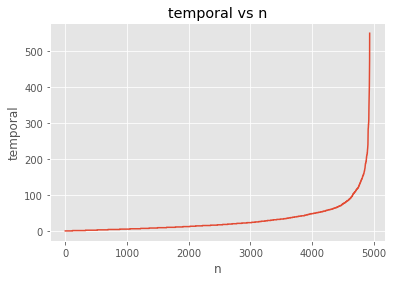

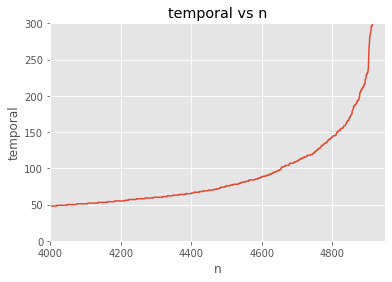

In [19]:
dist_temporal = search_eps(dataset_temporal,k2,'temporal')
zoom_eps(dist_temporal, 4000, 4950, 0, 300, 'temporal')

Dari kedua grafik, untuk data spatial, epsilon yang akan digunakan adalah 0.01. Sedangkan untuk data temporal, epsilon yang akan digunakan adalah 60.

In [21]:
eps1 = 0.025
eps2 = 200

## Algoritma ST-DBSCAN

INPUTS:

    df={o1,o2,...,on} Set of objects with header : (date_time, latitude, longitude, cluster)
    
    spatial_threshold = Maximum geographical coordinate (spatial) distance value
    
    temporal_threshold = Maximum non-spatial distance value
    
    min_neighbors = Minimun number of points within Eps1 and Eps2 distance
    
OUTPUT:

    C = {c1,c2,...,ck} Set of clusters

Algorithm in python adapted from https://github.com/eubr-bigsea/py-st-dbscan

In [20]:
def ST_DBSCAN(df, spatial_threshold, temporal_threshold, min_neighbors):
    cluster_label = 0
    NOISE = -1
    UNMARKED = 777777
    stack = []

    # initialize each point with unmarked
    df['cluster'] = UNMARKED
    
    # for each point in database
    for index, point in df.iterrows():
        
        # process point if it still not included in a cluster
        if df.loc[index]['cluster'] == UNMARKED:
            
            # search neighbors point
            neighborhood = retrieve_neighbors(index, df, spatial_threshold, temporal_threshold)
            
            # elimination for noise point
            if len(neighborhood) < min_neighbors:
                df.at[index, 'cluster'] = NOISE
                
            # found a core point
            else: 
                
                # assign a label to core point
                cluster_label = cluster_label + 1
                df.at[index, 'cluster'] = cluster_label
                
                # assign core's label to its neighborhood
                for neig_index in neighborhood: 
                    df.at[neig_index, 'cluster'] = cluster_label
                    stack.append(neig_index) # append neighborhood to stack
                    
                # find new neighbors from core point neighborhood
                while len(stack) > 0: 
                    current_point_index = stack.pop()
                    new_neighborhood = retrieve_neighbors(current_point_index, df, spatial_threshold, temporal_threshold)
                    
                    # current_point is a new core
                    if len(new_neighborhood) >= min_neighbors: 
                        for neig_index in new_neighborhood:
                            neig_cluster = df.loc[neig_index]['cluster']
                            if (neig_cluster != NOISE) & (neig_cluster == UNMARKED): 
                                # TODO: verify cluster average before add new point
                                df.at[neig_index, 'cluster'] = cluster_label
                                stack.append(neig_index)
    return df


def retrieve_neighbors(index_center, df, spatial_threshold, temporal_threshold):
    neigborhood = []

    center_point = df.loc[index_center]

    # filter by time 
    min_time = center_point['date_time'] - temporal_threshold
    max_time = center_point['date_time'] + temporal_threshold
    df = df[(df['date_time'] >= min_time) & (df['date_time'] <= max_time)]

    # filter by distance
    for index, point in df.iterrows():
        if index != index_center:
            # distance = great_circle((center_point['latitude'], center_point['longitude']), (point['latitude'], point['longitude'])).meters
            distance = math.sqrt((center_point['latitude']-point['latitude'])**2 + (center_point['longitude']-point['longitude'])**2)
            if distance <= spatial_threshold:
                neigborhood.append(index)

    return neigborhood

### Penggunaan ST-DBSCAN pada Data Tes

In [28]:
test_data = pd.read_excel("test data.xlsx")
test_data.head(10)

,longitude,latitude,date_time,cluster
0,46,84,14,UNMARKED
1,43,79,14,UNMARKED
2,23,88,20,UNMARKED
3,41,89,19,UNMARKED
4,16,82,11,UNMARKED
5,17,85,16,UNMARKED
6,40,79,14,UNMARKED
7,40,72,18,UNMARKED
8,45,73,10,UNMARKED
9,47,77,17,UNMARKED


In [29]:
min_neighbors = int(np.log(len(test_data)))
print(min_neighbors)

5


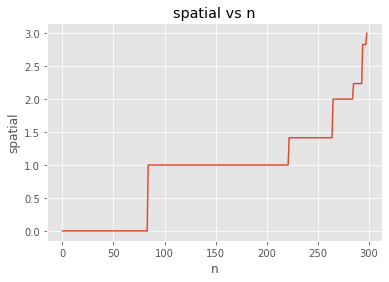

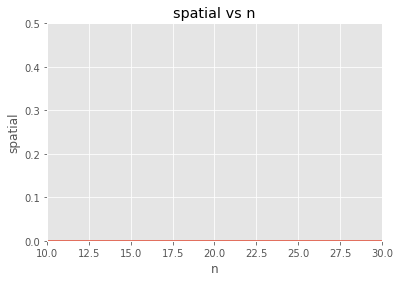

In [30]:
dataset_spatial = test_data[['latitude','longitude']]
dist_spatial = search_eps(dataset_spatial, min_neighbors, 'spatial')
zoom_eps(dist_spatial, 70, 100, 0, 0.5, 'spatial')

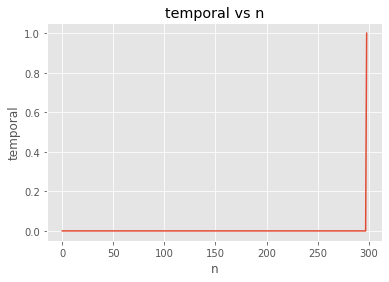

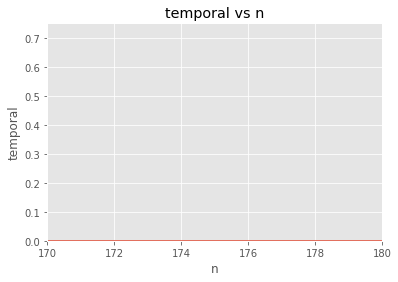

In [31]:
dataset_temporal = test_data[['date_time']]
dist_temporal = search_eps(dataset_temporal, min_neighbors, 'temporal')
zoom_eps(dist_temporal, 290, 310, 0, 0.75, 'temporal')

In [41]:
spatial_threshold = 5
temporal_threshold = 3

In [42]:
df_clustering = ST_DBSCAN(test_data, spatial_threshold, temporal_threshold, min_neighbors)

In [43]:
df_clustering.nunique()

longitude    52
latitude     42
date_time    37
cluster       5
dtype: int64

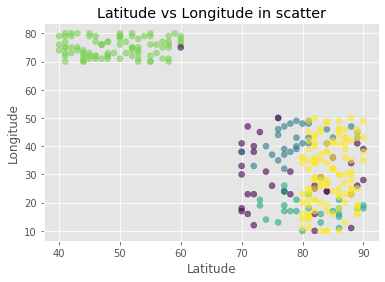

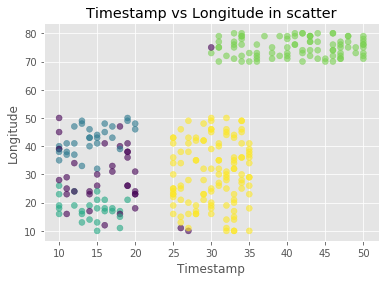

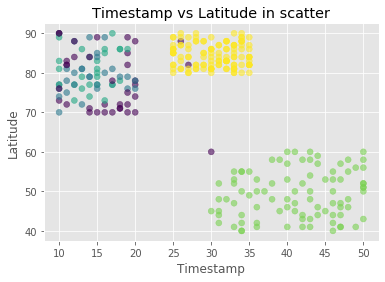

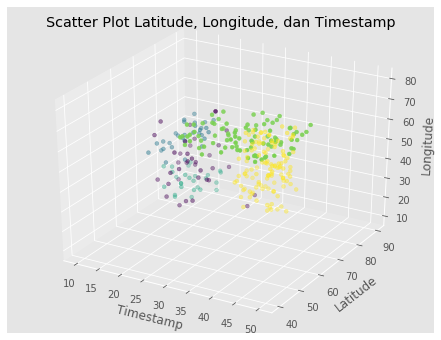

In [44]:
visualize_result(df_clustering)

### Penggunaan ST-DBSCAN pada Data Bencana

In [22]:
fixed_dataset = data[['latitude','longitude','timestamp']]
cluster = [0 for i in range (len(fixed_dataset))]
fixed_dataset.insert(3,"cluster", cluster, True)
# fixed_dataset.rename(columns={"latitude": "longitude", "longitude.anon": "latitude", "timestamp": "date_time"})
fixed_dataset.columns = ['latitude', 'longitude', 'date_time', 'cluster']
fixed_dataset.head(15)

,latitude,longitude,date_time,cluster
0,-3.063063,128.201175,1623575725,0
1,-3.628690,128.234010,1623740052,0
2,-3.279279,128.967932,1623571018,0
3,-3.656360,128.223790,1623579397,0
4,-3.699291,128.104886,1623830618,0
5,-3.675680,128.227730,1623806553,0
6,-3.689726,128.182880,1623831840,0
7,-3.627900,128.233070,1623752438,0
8,-3.697755,128.179263,1623647707,0
9,-3.097430,126.313573,1623803092,0


In [23]:
clustering_result = ST_DBSCAN(fixed_dataset, eps1, eps2, k2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
clustering_result.nunique()

latitude     3221
longitude    3315
date_time    4874
cluster         2
dtype: int64

In [25]:
clustering_result.head(15)

,latitude,longitude,date_time,cluster
0,-3.063063,128.201175,1623575725,-1
1,-3.628690,128.234010,1623740052,-1
2,-3.279279,128.967932,1623571018,-1
3,-3.656360,128.223790,1623579397,-1
4,-3.699291,128.104886,1623830618,-1
5,-3.675680,128.227730,1623806553,-1
6,-3.689726,128.182880,1623831840,-1
7,-3.627900,128.233070,1623752438,-1
8,-3.697755,128.179263,1623647707,-1
9,-3.097430,126.313573,1623803092,-1


### Visualisasi hasil clustering

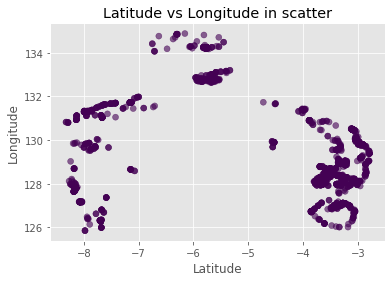

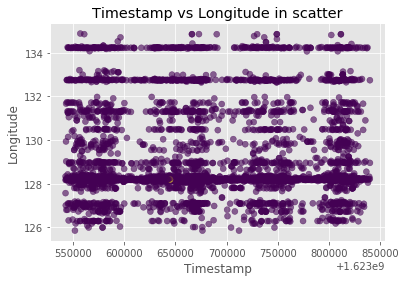

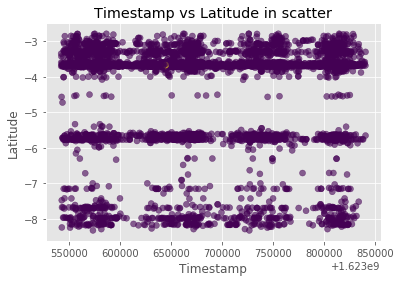

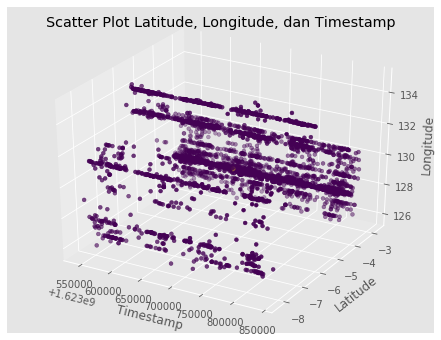

In [28]:
visualize_result(clustering_result)